In [1]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [2]:
dataset=pd.read_csv("dataset.csv",sep=";")

In [3]:
dataset.drop(["node"],inplace=True,axis=1)

In [5]:
dataset["date"]=pd.to_datetime(dataset["date"],format="%Y-%m-%d %H:%M:%S")

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242968 entries, 0 to 2242967
Data columns (total 3 columns):
 #   Column       Dtype         
---  ------       -----         
 0   consumption  float64       
 1   substation   object        
 2   date         datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 51.3+ MB


In [7]:
dataset.head()

,consumption,substation,date
0,-2.762882,AJAHUEL,2017-04-01
1,-119.559726,BUIN,2017-04-01
2,64.807776,BUIN,2017-04-01
3,-4.348032,LOSALME,2017-04-01
4,69.637895,LOSALME,2017-04-01


In [8]:
train=dataset.query("date.dt.year>2017 and date.dt.year <2022")

In [9]:
test=dataset.query("date.dt.year==2022")

In [10]:
serie_test=test.groupby(["substation","date"]).agg("sum")
serie_test.to_csv("test.csv")

In [11]:
serie_train=train.groupby(["substation","date"]).agg("sum")
serie_train.to_csv("train.csv")

In [12]:
ds_train=pd.read_csv("train.csv")
ds_train["date"]=pd.to_datetime(ds_train["date"],format="%Y-%m-%d %H:%M:%S")
ds_train=ds_train.set_index("date")
ds_train.head()

,substation,consumption
date,,
2018-01-01 00:00:00,AJAHUEL,137.330840
2018-01-01 01:00:00,AJAHUEL,124.045549
2018-01-01 02:00:00,AJAHUEL,118.137811
2018-01-01 03:00:00,AJAHUEL,107.899499
2018-01-01 04:00:00,AJAHUEL,100.362069


In [13]:
ds_test=pd.read_csv("test.csv")
ds_test["date"]=pd.to_datetime(ds_test["date"],format="%Y-%m-%d %H:%M:%S")
ds_test=ds_test.set_index("date")
ds_test.head()

,substation,consumption
date,,
2022-01-01 00:00:00,AJAHUEL,102.093131
2022-01-01 01:00:00,AJAHUEL,82.379086
2022-01-01 02:00:00,AJAHUEL,75.126780
2022-01-01 03:00:00,AJAHUEL,69.140084
2022-01-01 04:00:00,AJAHUEL,66.442176


In [14]:
subestaciones=["AJAHUEL","BUIN","CHENA","CNAVIA","ELSALTO","FLORIDA","LOSALME"]

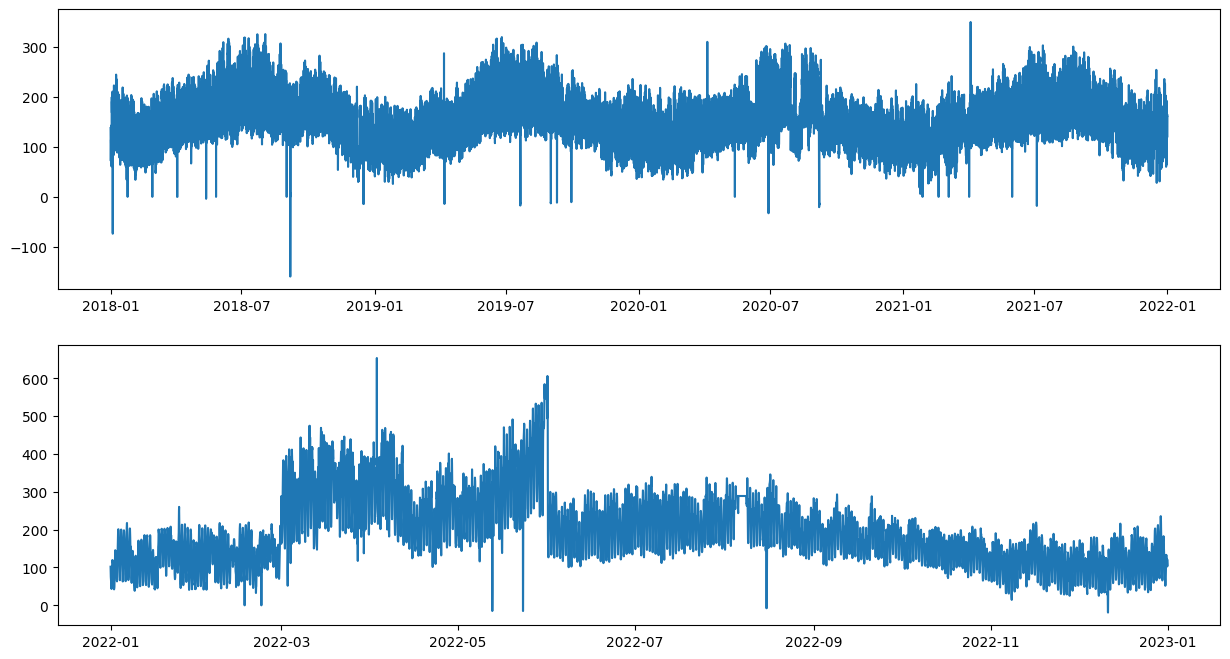

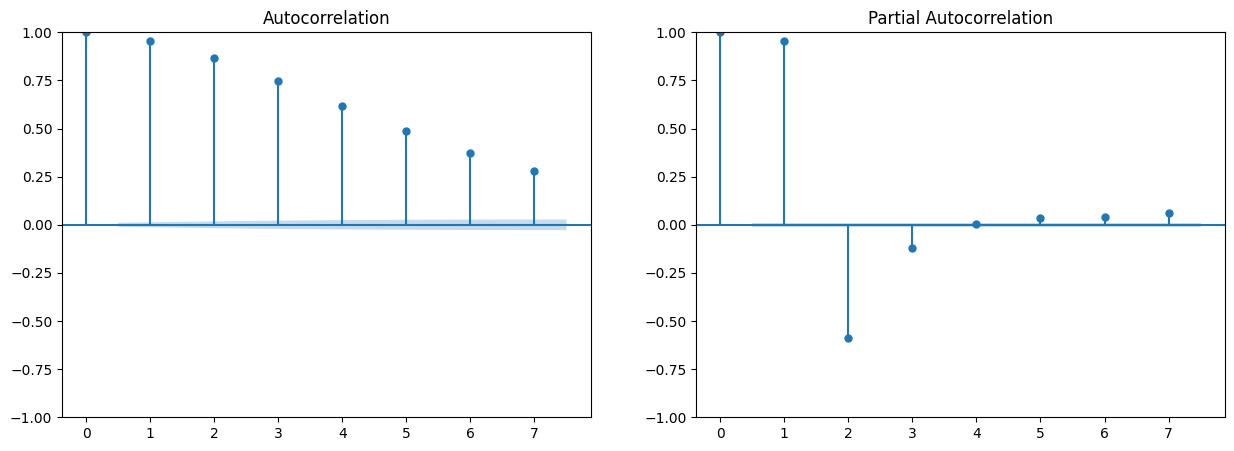

In [15]:
subestacion="AJAHUEL"
filtro="substation=='{0}'".format(subestacion)
y=ds_train.query(filtro)["consumption"]
x=ds_train.query(filtro).index
yt=ds_test.query(filtro)["consumption"]
xt=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15, 8)
axes[0].plot(x,y);
axes[1].plot(xt,yt);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(y,lags=7,ax=axes[0]);
plot_pacf(y,lags=7,method="ywm",ax=axes[1]);

<Axes: xlabel='hour', ylabel='consumption'>

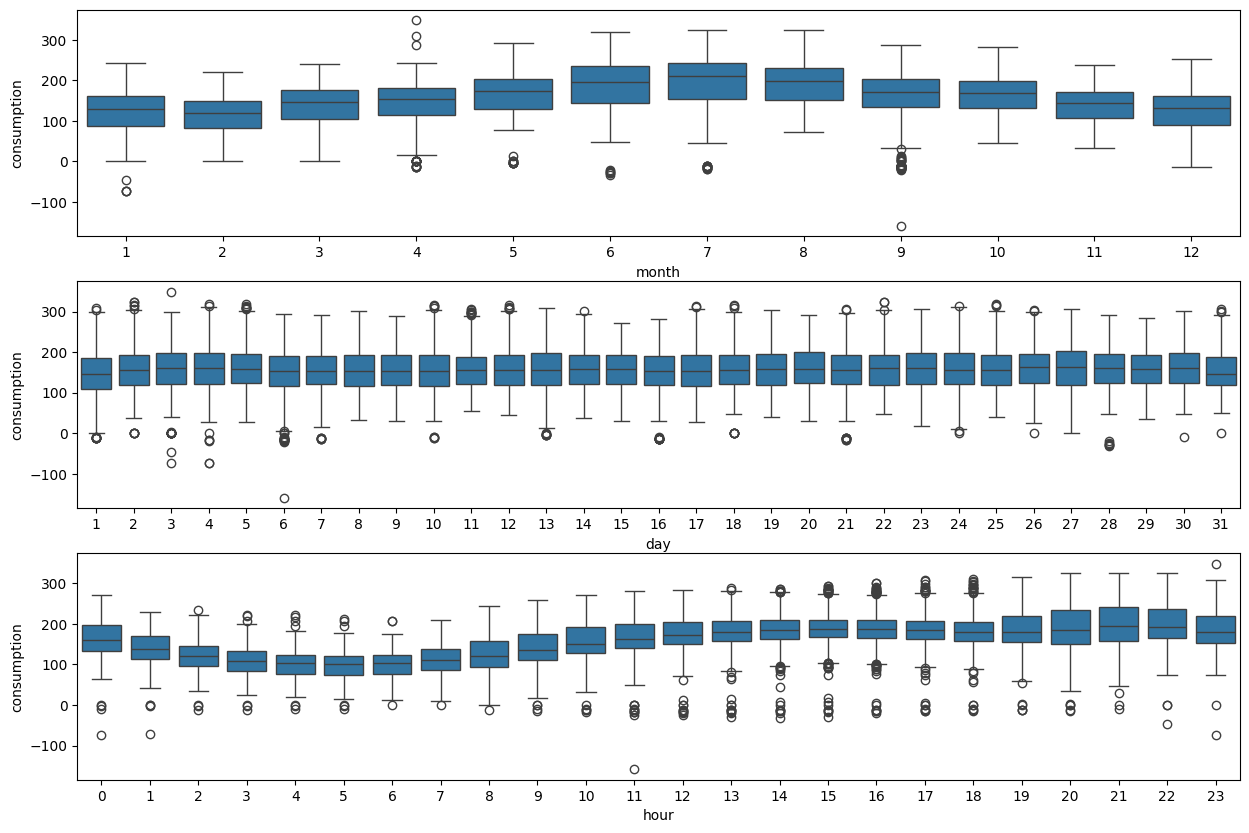

In [16]:
import seaborn as sns

data=pd.DataFrame()
data["consumption"]=y
data["date"]=y.index
data["day"]=data["date"].dt.day
data["hour"]=data["date"].dt.hour
data["month"]=data["date"].dt.month

fig, axes = plt.subplots(3,1)
fig.set_size_inches(15, 10)

sns.boxplot(x="month", y="consumption",data=data,ax=axes[0])
sns.boxplot(x="day", y="consumption",data=data,ax=axes[1])
sns.boxplot(x="hour", y="consumption",data=data,ax=axes[2])

In [17]:
data["year"]=data["date"].dt.year
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34913 entries, 2018-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   consumption  34913 non-null  float64       
 1   date         34913 non-null  datetime64[ns]
 2   day          34913 non-null  int32         
 3   hour         34913 non-null  int32         
 4   month        34913 non-null  int32         
 5   year         34913 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(4)
memory usage: 1.3 MB


In [18]:
data_ys=data[["year","month","day","consumption"]].groupby(["year","month","day"]).agg("mean")
data_ys.to_csv("data_ys.csv")

In [19]:
from datetime import datetime
ys=[]
xs=[]
archivo=open("data_ys.csv")
archivo.readline()
for linea in archivo:
    linea=linea.strip().split(",")
    ys.append(float(linea[3]))
    fecha=str(linea[0])+"-"+str(linea[1]).zfill(2)+"-"+str(linea[2]).zfill(2)
    xs.append(datetime.strptime(fecha,"%Y-%m-%d"))

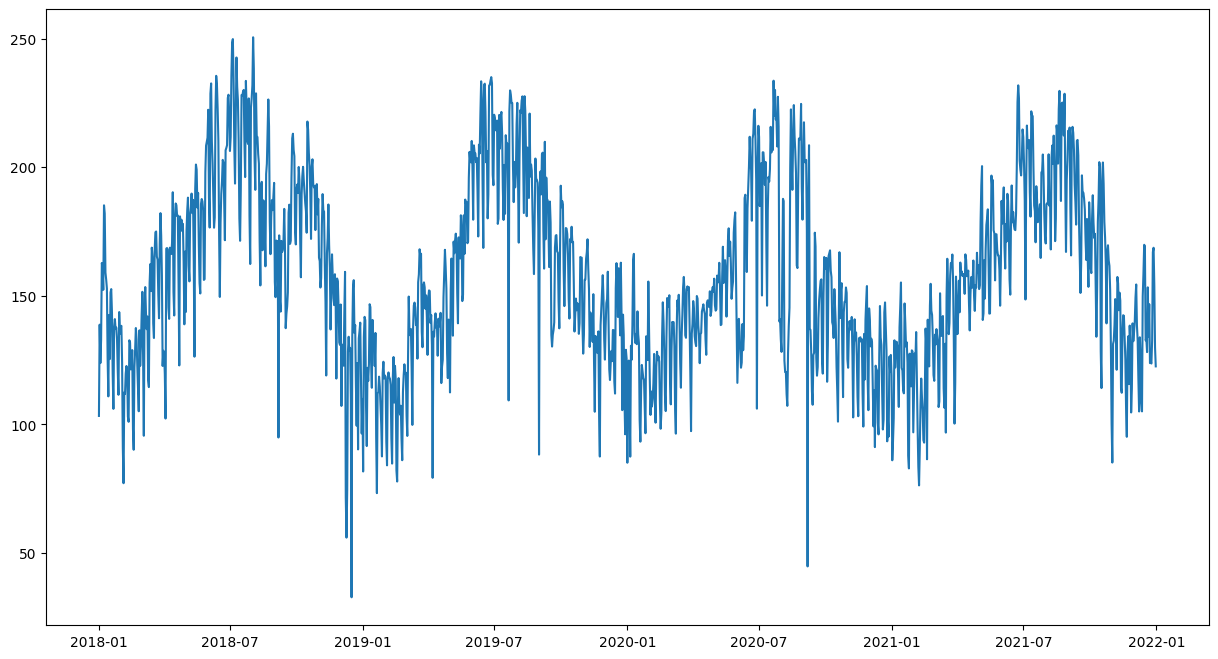

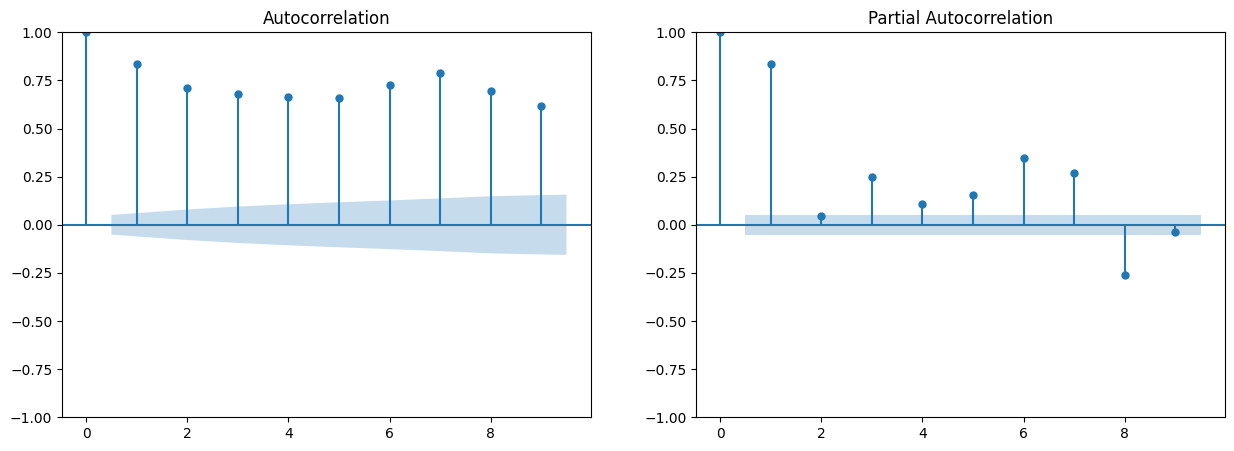

In [20]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(ys,lags=9,ax=axes[0]);
plot_pacf(ys,lags=9,method="ywm",ax=axes[1]);

In [21]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ys)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.507892
p-value: 0.113566
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [22]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

In [23]:
modelo_ajahuel_d=ARIMA(ys,order=(8,0,8))
m_ad1=modelo_ajahuel_d.fit()
print("MSE",m_ad1.mse)
print("AIC",m_ad1.aic)
ysp=m_ad1.predict()
mape=mean_absolute_percentage_error(ys,ysp)
print("MAPE",mape)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSE 217.61592798362523
AIC 12040.618163007679
MAPE 0.07247042711425992


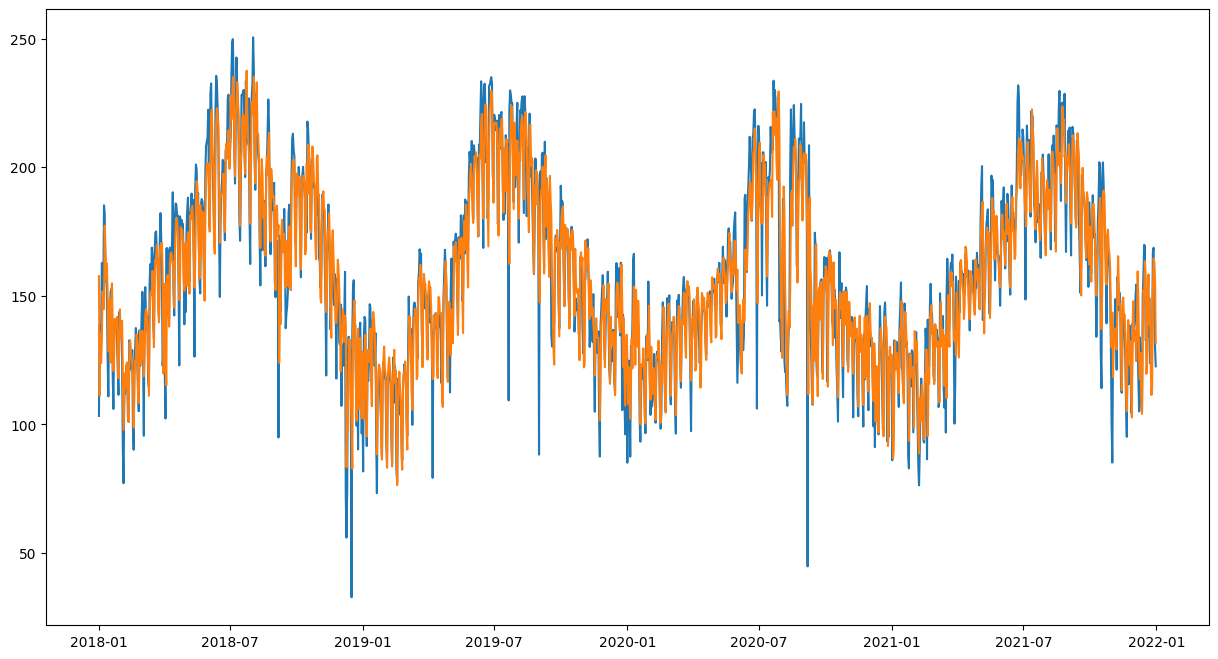

In [25]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys,xs,ysp);

In [26]:
yw=[]
yt=[]
window=8
for i in range(0,len(ys)):
    if i+window < len(ys):
        row=[]
        for j in range(window):
            row.append(ys[i+j])
        yw.append(row)
        yt.append(ys[i+window])
    else:
        break
print(len(yw))

1453


In [27]:
yw=np.asarray(yw)
yt=np.asarray(yt)

In [28]:
import tensorflow as tf
from datetime import datetime
from tensorflow import keras
from keras.layers import Attention,MultiHeadAttention, Input, Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import random as rd

In [27]:
seed=12122008
rd.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [28]:
d=128
input=Input(name="activity",shape=(8,1))
attention = MultiHeadAttention(num_heads=1,key_dim=d)(input, input, input,return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model=Model(inputs=input,outputs=output)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ activity            │ (None, 8, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 8, 1)      │        897 │ activity[0][0],   │
│ (MultiHeadAttentio… │                   │            │ activity[0][0],   │
│                     │                   │            │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 8, 128)    │        256 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 1024)      │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │      1,025 │ flatten[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,178 (8.51 KB)

 Trainable params: 2,178 (8.51 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
tag="mhatt"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model.fit(yw, yt, batch_size=128, epochs=4,verbose=1,callbacks=[tensorboard_callback])
model.save(log_dir+'/model_{0}.keras'.format(tag))


Epoch 1/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 26477.4180 - mae: 158.6339 - mape: 100.3975 - mse: 26511.9707
Epoch 2/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10329.8955 - mae: 91.8971 - mape: 57.6274 - mse: 10366.2383  
Epoch 3/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2864.1584 - mae: 47.0314 - mape: 32.6759 - mse: 2874.8308 
Epoch 4/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 982.8568 - mae: 26.8778 - mape: 16.8196 - mse: 985.9368 


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


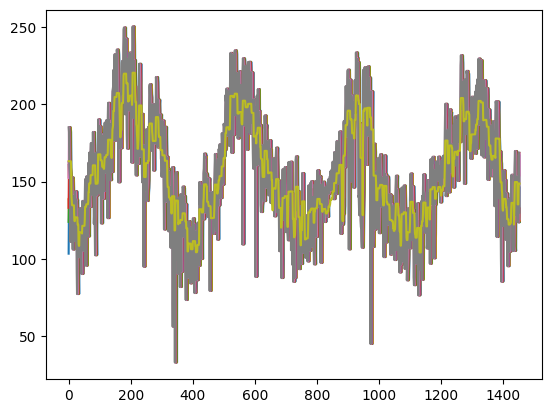

In [30]:
xw=[i for i in range(len(yw))]
yp=model.predict(yw)
plt.plot(xw,yw,xw,yp)

In [31]:
yw.shape

(1453, 8)

In [32]:
attention_output,attention_scores=model.layers[1](yw[:1].reshape(1,8,1),
                yw[:1].reshape(1,8,1),
                yw[:1].reshape(1,8,1),
                return_attention_scores=True)

In [33]:
attention_scores.shape

TensorShape([1, 1, 8, 8])

In [34]:
attention_output.shape

TensorShape([1, 8, 1])

In [35]:
import seaborn as sb

In [36]:
timesteps = ["t"+str(i) for i in range(8)]
timesteps.reverse()

In [37]:
timesteps

['t7', 't6', 't5', 't4', 't3', 't2', 't1', 't0']

<Axes: >

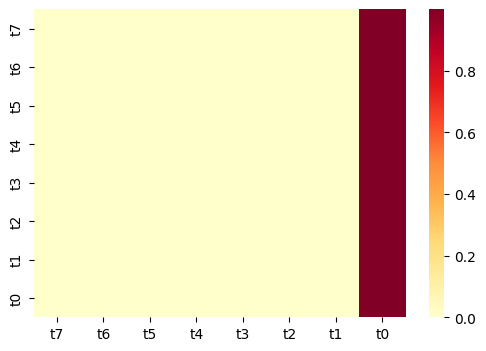

In [38]:
xticklb = timesteps
yticklb = timesteps
figure, axis = plt.subplots(1, 1)
figure.set_figheight(4)
figure.set_figwidth(6)
att=attention_scores[0,0,:,:]
sb.heatmap(att, xticklabels=xticklb, yticklabels=yticklb, cmap="YlOrRd",ax=axis)

In [39]:
W=model.layers[1].get_weights()

In [40]:
len(W)

8

In [41]:
componentes=["query","query_bias","key","key_bias","value","value_bias",
             "projection","projection"]
for name, out in zip(componentes,W):
    print(name, out.shape)

query (1, 1, 128)
query_bias (1, 128)
key (1, 1, 128)
key_bias (1, 128)
value (1, 1, 128)
value_bias (1, 128)
projection (1, 128, 1)
projection (1,)


In [42]:
d=128
input=Input(name="activity",shape=(8,1))
q = Dense(name="wq",units=d)(input)
k = Dense(name="wk",units=d)(input)
v = Dense(name="wv",units=d)(input)
attention = Attention()([q, v, k],return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model2=Model(inputs=input,outputs=output)
model2.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ activity            │ (None, 8, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wq (Dense)          │ (None, 8, 128)    │        256 │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wv (Dense)          │ (None, 8, 128)    │        256 │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wk (Dense)          │ (None, 8, 128)    │        256 │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 8, 128)    │          0 │ wq[0][0],         │
│ (Attention)         │                   │            │ wv[0][0],         │
│                     │                   │            │ wk[0][0]          │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 8, 128)    │     16,512 │ attention[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 1024)      │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │      1,025 │ flatten_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 18,305 (71.50 KB)

 Trainable params: 18,305 (71.50 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
tag="att"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model2.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model2.fit(yw, yt, batch_size=128, epochs=4,verbose=1,callbacks=[tensorboard_callback])
model2.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/4


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 7651.9336 - mae: 72.5722 - mape: 46.6960 - mse: 7680.7090
Epoch 2/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1391.1212 - mae: 32.1215 - mape: 20.1349 - mse: 1393.2864
Epoch 3/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 758.3396 - mae: 21.1412 - mape: 15.2764 - mse: 757.4835
Epoch 4/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 494.3025 - mae: 17.0352 - mape: 12.0017 - mse: 494.3440


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


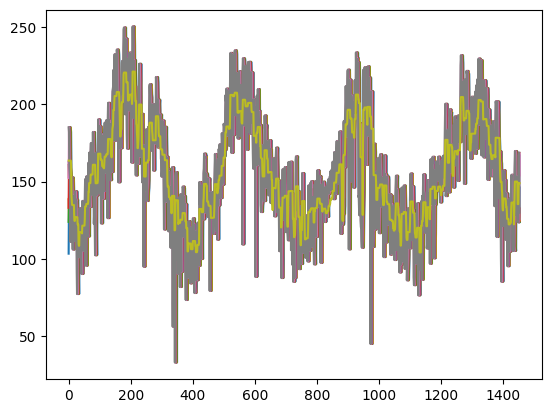

In [44]:
xw=[i for i in range(len(yw))]
yp=model2.predict(yw)
plt.plot(xw,yw,xw,yp)

In [45]:
attention_output,attention_scores=model2.layers[4]([yw[:1].reshape(1,8,1),
                yw[:1].reshape(1,8,1),
                yw[:1].reshape(1,8,1)],
                return_attention_scores=True)

<Axes: >

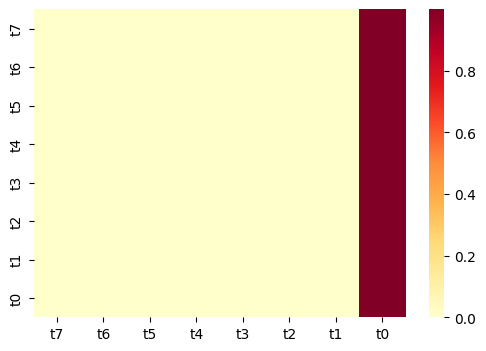

In [46]:
xticklb = timesteps
yticklb = timesteps
figure, axis = plt.subplots(1, 1)
figure.set_figheight(4)
figure.set_figwidth(6)
att=attention_scores[0,:,:]
sb.heatmap(att, xticklabels=xticklb, yticklabels=yticklb, cmap="YlOrRd",ax=axis)

In [47]:
attention_output.shape

TensorShape([1, 8, 1])

In [48]:
attention_scores.shape

TensorShape([1, 8, 8])

In [49]:
yw.shape

(1453, 8)

In [50]:
W=model2.layers[5].get_weights()
for i in range(len(W)):
    print(i,"=",W[i].shape)

0 = (128, 128)
1 = (128,)
